In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('model_dying_leaves.h5')

In [3]:
class_labels  ={'disease': 0, 'natural': 1}

In [4]:
class_labels = {v: k for k, v in class_labels.items()}
class_labels

{0: 'disease', 1: 'natural'}

In [7]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224)) 
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    return img_array

In [8]:
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1) 
    predicted_class_label = class_labels[predicted_class_idx[0]]

    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off') 
    plt.title(f'Predicted Class: {predicted_class_label}')  
    plt.show()
    
    return predicted_class_label, predictions[0].max()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


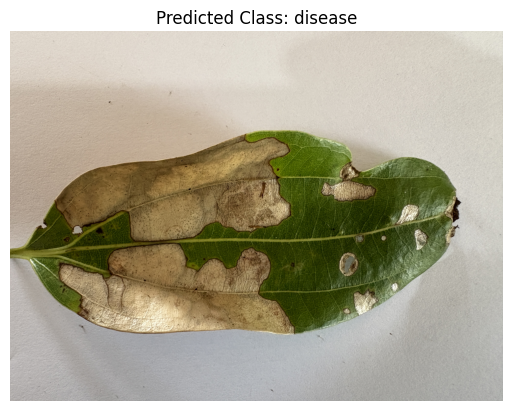

Predicted Class: disease
Prediction Probabilities: 0.9999651908874512


In [12]:
img_path = 'dying_leaves\\test\\disease\\IMG_0840.JPG'
predicted_class, predictions = predict_image(img_path)
print(f'Predicted Class: {predicted_class}')
print(f'Prediction Probabilities: {predictions}')